In [1]:
import numpy as np
from imageio import imread, imwrite
from matplotlib import pyplot as plt
# from matplotlib.pyplot import imshow
from scipy.ndimage.filters import convolve
import cv2


C:\Users\donia\AppData\Local\Temp/ipykernel_6260/2142522697.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imread("Broadway_tower_edit.jpg")


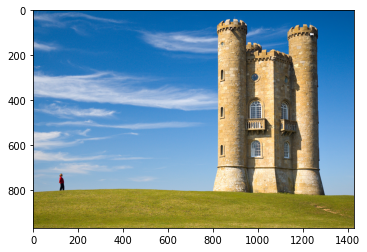

In [19]:
img = imread("Broadway_tower_edit.jpg")
plt.imshow(img)


In [20]:
res_img = cv2.resize(img, (999, 968))

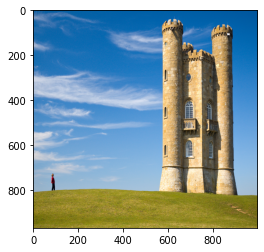

In [21]:
plt.imshow(res_img)
imwrite("scaled2.jpg", res_img)

Energy Map

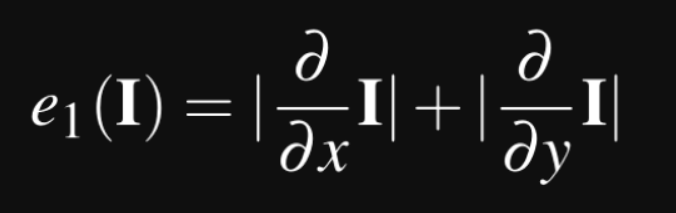

compute the derivative of the image using the sobel filter

In [5]:
def calcEnergy(img):
    sobelX = np.array([[-0.25, -1, -0.25],
                       [0, 0, 0],
                       [0.25, 1, 0.25]])
    
    # This converts it from a 2D filter to a 3D filter, replicating the same filter for each channel: R, G, B
    # it is done for each sobel kernel
    sobelX = np.stack([sobelX] *3, axis=2)
    
    sobelY = np.array([[-0.25, 0, 0.25],
                       [-1, 0, 1],
                       [-0.25, 0, 0.25]])
    sobelY = np.stack([sobelY] *3, axis=2)
    
    img = img.astype('float32')
    convolved = np.absolute(convolve(img, sobelX)) + np.absolute(convolve(img, sobelY))
    
    energyMap = convolved.sum(axis=2)
    
    return energyMap
    

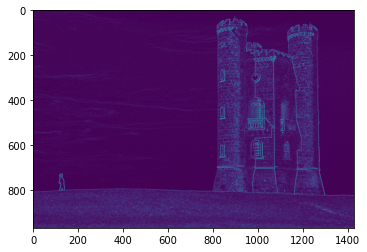

In [6]:
plt.imshow(calcEnergy(img))

In [13]:
def minimumSeam(img):
    row, col, _ = img.shape
    energyMap = calcEnergy(img)
    
    energyCopy = energyMap.copy()
    backtrack = np.zeros_like(energyCopy, dtype=np.int)
    
    for i in range(1, row):
        for j in range (0, col):
            if (j==0):
                idx = np.argmin(energyCopy[i - 1] [j:j+2])
                backtrack[i] [j] = idx + j
                minEnergy = energyCopy[i - 1] [idx + j]
                
            else:
                idx = np.argmin(energyCopy[i-1] [j-1:j+2])
                backtrack[i] [j] = idx + j -1
                minEnergy = energyCopy[i-1] [idx+j-1]
                
            energyCopy[i] [j] += minEnergy
                
    return energyCopy, backtrack
                
                
    

In [14]:
def removeSeam(img):
    row, col, _ = img.shape
    
    energyCopy, backtrack = minimumSeam(img)
    
    mask = np.ones((row, col), dtype = np.bool)
    
    j = np.argmin(energyCopy[-1])
    
    for i in reversed(range(row)):
        mask[i] [j] = False
        j = backtrack[i] [j]
        img[i][j] = 0
        
    mask = np.stack([mask]*3, axis=2)
    
    img = img[mask].reshape((row, col-1, 3))
    
    
    return img

In [15]:
seam1 = removeSeam(img)

C:\Users\donia\AppData\Local\Temp/ipykernel_6260/823974493.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  backtrack = np.zeros_like(energyCopy, dtype=np.int)
C:\Users\donia\AppData\Local\Temp/ipykernel_6260/2587840835.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/d

In [20]:
seam2 = removeSeam(seam1)

C:\Users\donia\AppData\Local\Temp/ipykernel_1108/823974493.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  backtrack = np.zeros_like(energyCopy, dtype=np.int)
C:\Users\donia\AppData\Local\Temp/ipykernel_1108/2587840835.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/d

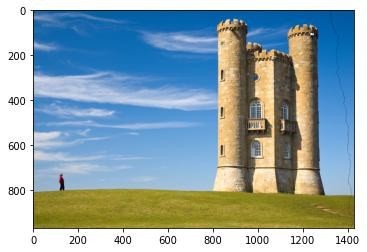

In [16]:
plt.imshow(seam1)

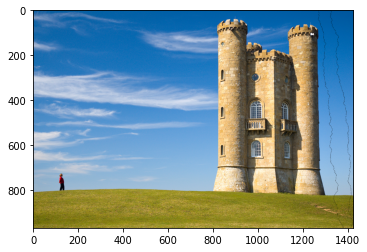

In [21]:
plt.imshow(seam2)

In [9]:
def repeat(img, scale):
    row, col, _ = img.shape
    newCol = int(scale * col)
    
    for i in range (col - newCol):
        img = removeSeam(img)
        
    return img

In [8]:
def main():
    scale = 0.7
    
    out = repeat(img, scale)
    
    imwrite("SeamCarvedImg2.jpg", out)
    
if __name__ == "__main__":
    main()
    

C:\Users\donia\AppData\Local\Temp/ipykernel_14188/823974493.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  backtrack = np.zeros_like(energyCopy, dtype=np.int)
C:\Users\donia\AppData\Local\Temp/ipykernel_14188/1435769502.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org